# TimeCopilot Forecaster (Anomaly Detection)

## Import libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from timecopilot import TimeCopilotForecaster


## Load the dataset. 

The DataFrame must include at least the following columns:
- unique_id: Unique identifier for each time series (string)
- ds: Date column (datetime format)
- y: Target variable for forecasting (float format)


In [24]:
df = pd.read_csv(
    "https://timecopilot.s3.amazonaws.com/public/data/the_anomaly_tour.csv",
    parse_dates=["ds"],
)
df


,unique_id,ds,y
0,Taylor Swift,2022-07-01,21499
1,Taylor Swift,2022-07-02,16349
2,Taylor Swift,2022-07-03,15042
3,Taylor Swift,2022-07-04,14358
4,Taylor Swift,2022-07-05,18332
...,...,...,...
6577,Selena Gomez,2025-06-27,8348
6578,Selena Gomez,2025-06-28,8670
6579,Selena Gomez,2025-06-29,9167
6580,Selena Gomez,2025-06-30,7902


## Import the models you want to use

In [25]:
from timecopilot.models.stats import SeasonalNaive, Theta
from timecopilot.models.foundation.chronos import Chronos
from timecopilot.models.foundation.flowstate import FlowState


## Create a TimeCopilotForecaster


In [28]:

tcf = TimeCopilotForecaster(
    models=[
        Chronos(repo_id="amazon/chronos-bolt-mini"),
        FlowState(),
        SeasonalNaive(),
        Theta(),
    ]
)

## Plot the data

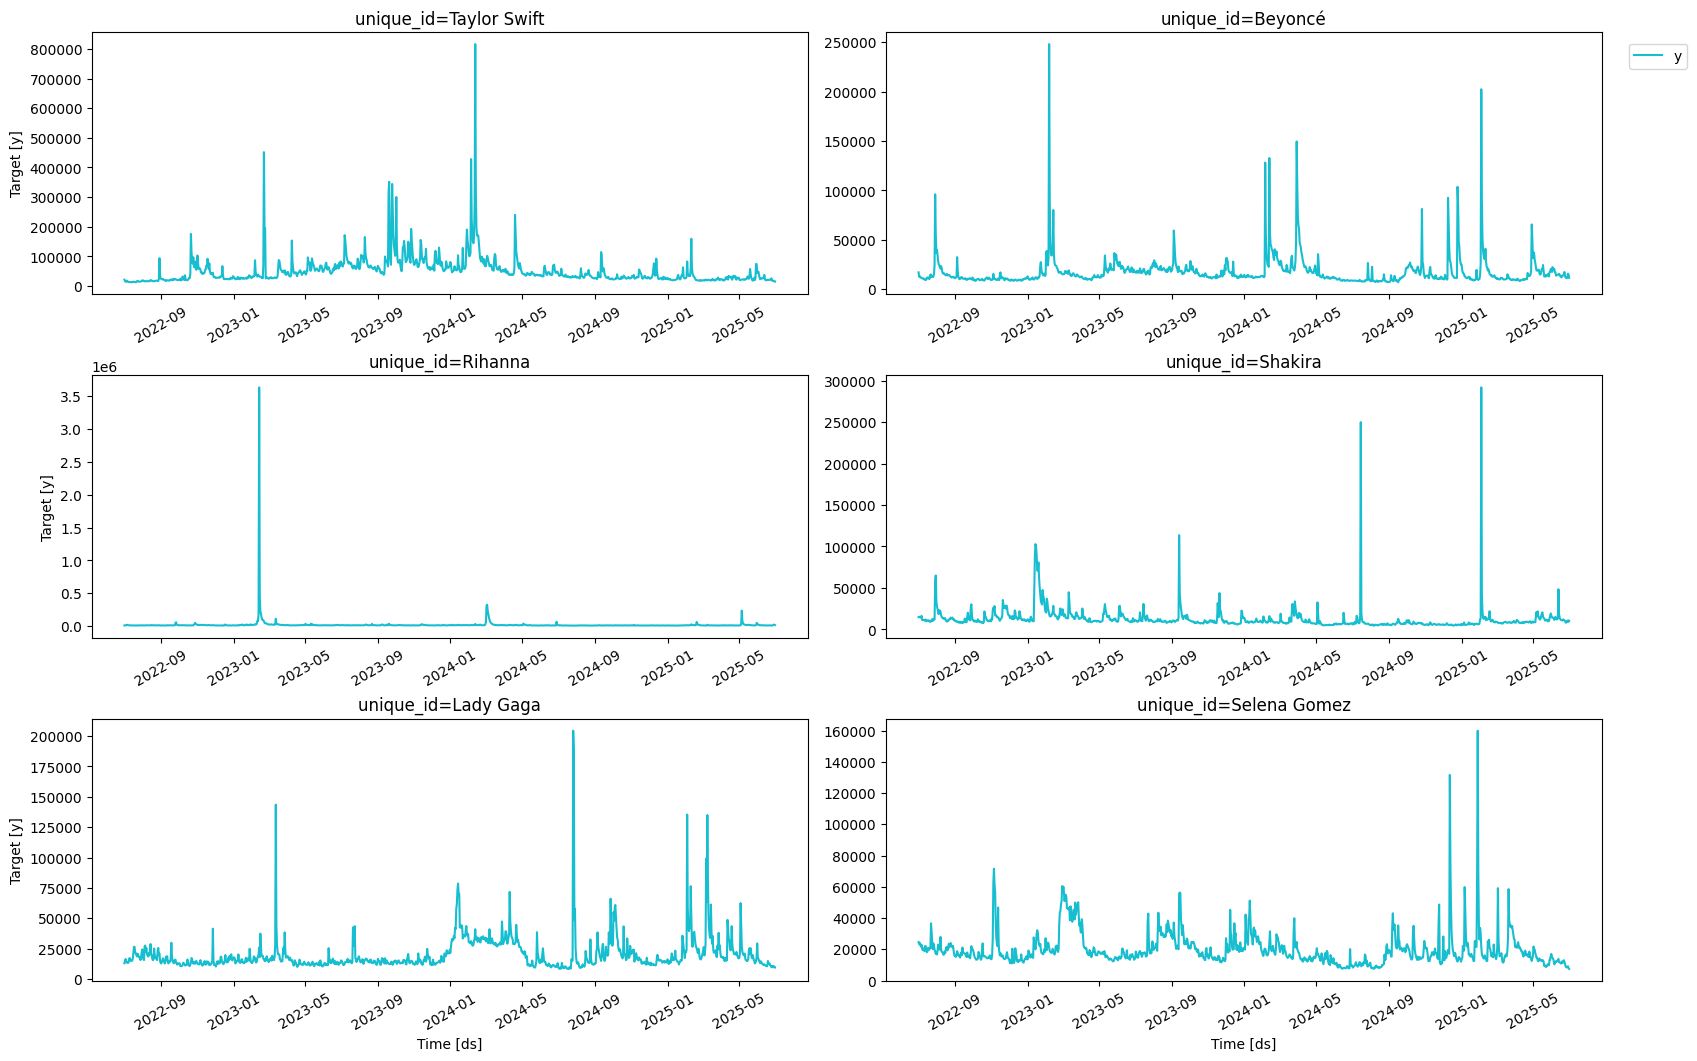

In [29]:
tcf.plot(df)


## Detect anomalies

You can optionally specify the following parameters:
- freq: The frequency of your data (e.g., 'D' for daily, 'M' for monthly). If you skip it, it will be inferred by default.
- h: The forecast horizon, which is the number of periods to predict during cross validation (you can skip it, and it will use an inferred seasonality)


In [ ]:
anomalies_df = tcf.detect_anomalies(df=df, h=7, level=99)

In [31]:
anomalies_df

,unique_id,ds,cutoff,y,Chronos,Chronos-lo-99,Chronos-hi-99,Chronos-anomaly,FlowState,FlowState-lo-99,FlowState-hi-99,FlowState-anomaly,SeasonalNaive,SeasonalNaive-lo-99,SeasonalNaive-hi-99,SeasonalNaive-anomaly,Theta,Theta-lo-99,Theta-hi-99,Theta-anomaly
0,Beyoncé,2022-07-06,2022-07-05,11571,11145.848633,-26105.343962,48397.041228,False,11127.576172,-25824.447434,48079.599778,False,11633.0,-30482.516525,53748.516525,False,10975.327148,-31700.535951,53651.190248,False
1,Beyoncé,2022-07-07,2022-07-05,11046,11386.040039,-25865.152556,48637.232634,False,10919.440430,-26032.583176,47871.464035,False,11633.0,-30482.516525,53748.516525,False,10399.726562,-32276.136537,53075.589662,False
2,Beyoncé,2022-07-08,2022-07-05,10874,11603.713867,-25647.478728,48854.906462,False,10822.110352,-26129.913254,47774.133957,False,11633.0,-30482.516525,53748.516525,False,9824.126953,-32851.736146,52499.990052,False
3,Beyoncé,2022-07-09,2022-07-05,10471,11858.917969,-25392.274626,49110.110563,False,10851.082031,-26100.941575,47803.105637,False,11633.0,-30482.516525,53748.516525,False,9248.526367,-33427.336732,51924.389466,False
4,Beyoncé,2022-07-10,2022-07-05,10721,12076.591797,-25174.600798,49327.784392,False,10776.775391,-26175.248215,47728.798996,False,11633.0,-30482.516525,53748.516525,False,8672.926758,-34002.936341,51348.789857,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6547,Taylor Swift,2025-06-27,2025-06-24,17837,21935.486328,-78538.233969,122409.206625,False,23186.416016,-74337.494379,120710.326411,False,21965.0,-108196.537131,152126.537131,False,21373.949219,-111072.688801,153820.587238,False
6548,Taylor Swift,2025-06-28,2025-06-24,17536,21935.486328,-78538.233969,122409.206625,False,22668.628906,-74855.281489,120192.539301,False,21965.0,-108196.537131,152126.537131,False,21367.833984,-111078.804035,153814.472004,False
6549,Taylor Swift,2025-06-29,2025-06-24,17960,21935.486328,-78538.233969,122409.206625,False,22706.308594,-74817.601801,120230.218989,False,21965.0,-108196.537131,152126.537131,False,21361.716797,-111084.921223,153808.354817,False
6550,Taylor Swift,2025-06-30,2025-06-24,15490,22124.191406,-78349.528891,122597.911703,False,22523.058594,-75000.851801,120046.968989,False,21965.0,-108196.537131,152126.537131,False,21355.601562,-111091.036457,153802.239582,False


## Plot results

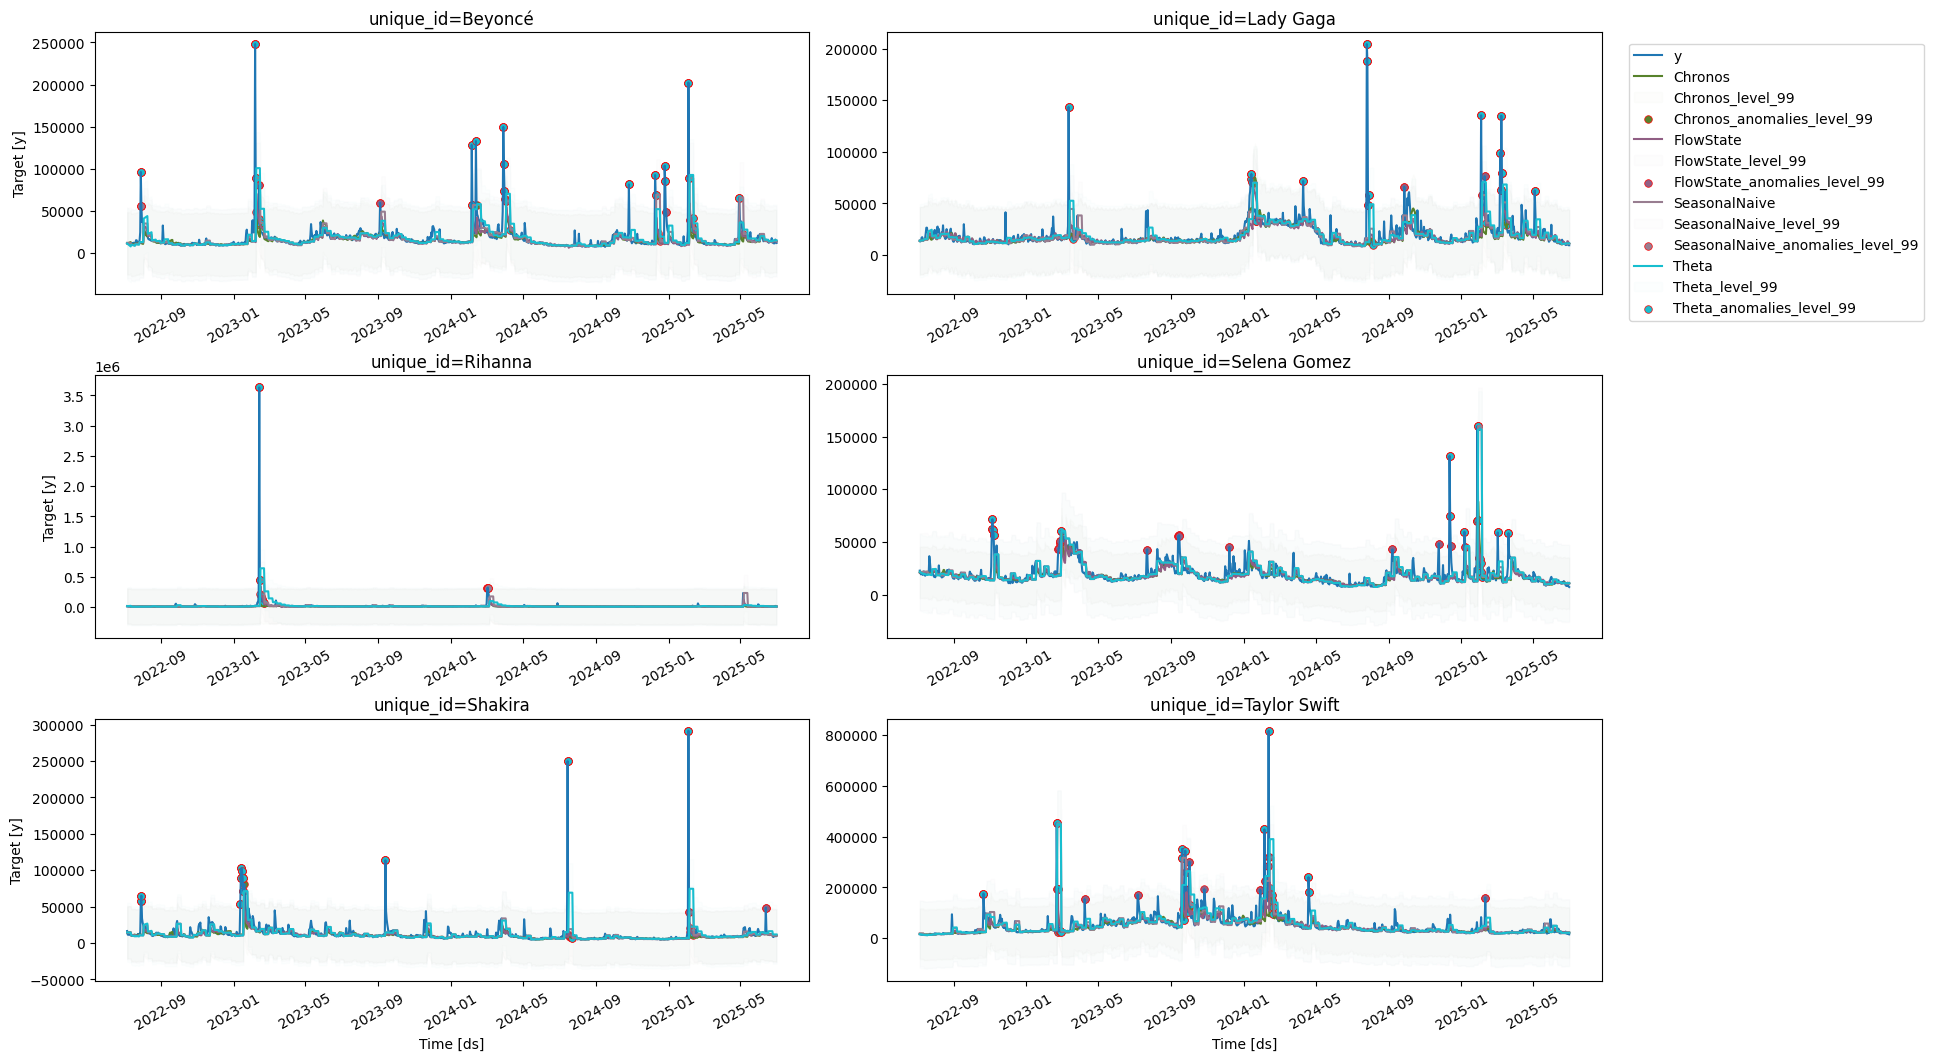

In [32]:
tcf.plot(df, anomalies_df)